In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib,glob
image_count = len(list(glob.glob('train/*/*.jpg')))
print(image_count)


2000


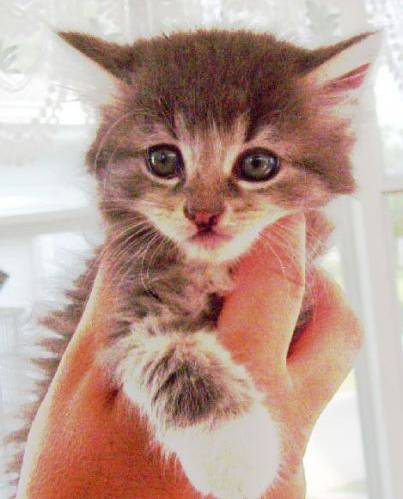

In [4]:
cats = list(glob.glob('train/cats/*.jpg'))
PIL.Image.open(str(cats[3]))

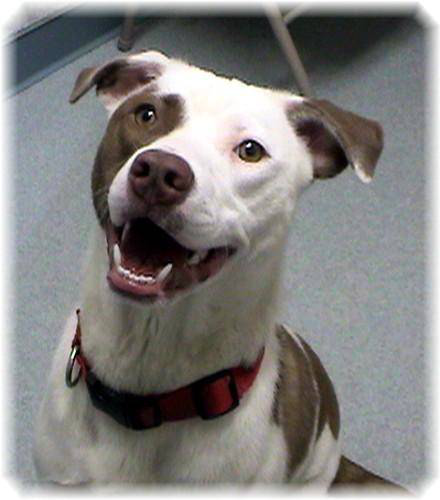

In [5]:
dogs = list(glob.glob('train/dogs/*.jpg'))
PIL.Image.open(str(dogs[4]))

In [6]:
#Load data using a Keras utility

In [7]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  'train/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2001 files belonging to 2 classes.
Using 1601 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'train/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2001 files belonging to 2 classes.
Using 400 files for validation.


In [9]:
class_names=val_ds.class_names

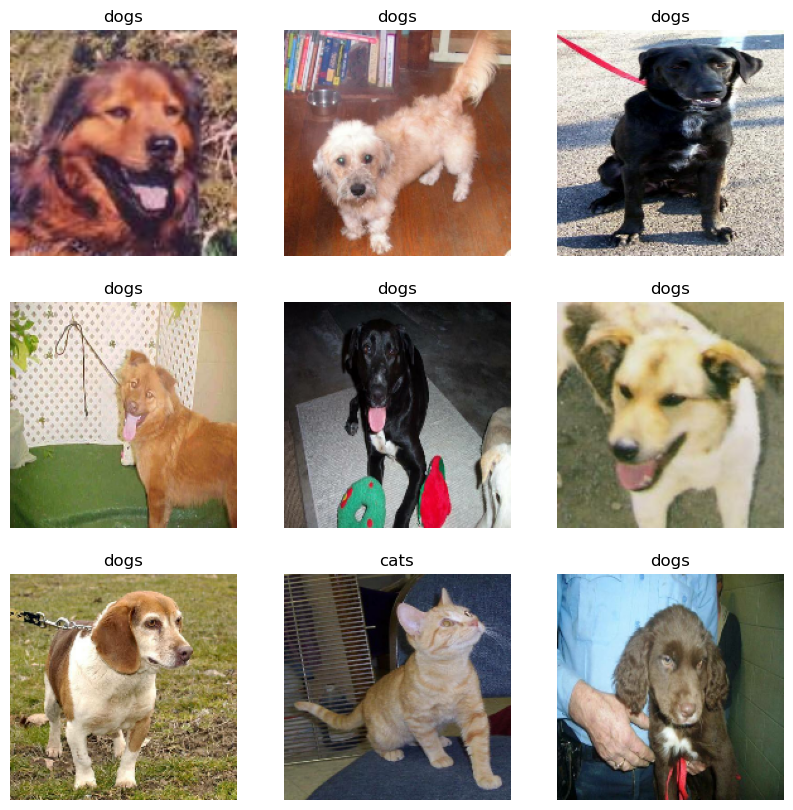

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in val_ds:
  #print(image_batch.shape)
  print(labels_batch.shape)
  #break

(32,)
(32,)
(32,)
(32,)
(32,)
(32,)
(32,)
(32,)
(32,)
(32,)
(32,)
(32,)
(16,)


## Configure the dataset for performance

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data
Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling:
### There are two ways to use this layer. 
##### - You can apply it to the dataset by calling Dataset.map.
##### - Or, you can include the layer inside your model definition, which can simplify deployment.



In [13]:
normalization_layer = layers.Rescaling(1./255)

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

## Keras Sequential model
The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned for high accuracy; the goal of this tutorial is to show a standard approach.

In [16]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Build a model
#### compile
pack all part together, decide a model architecture, this is the number of hidden layers and activation functions, etc. (compile)
#### Secondly,(fit) 
this is the training, train the model to get all the paramters to the correct value to map our inputs to our outputs. (fit)
#### Lastly, (predict) 
after training model is ready to be used to predict unseen inputs. (predict) 
###### we might (or for sure, go back to enhance model performance)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)       

In [19]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
51/51 [==============================] - 33s 589ms/step - loss: 0.7643 - accuracy: 0.5234 - val_loss: 0.6900 - val_accuracy: 0.4950
Epoch 2/10
51/51 [==============================] - 29s 560ms/step - loss: 0.6649 - accuracy: 0.6021 - val_loss: 0.6824 - val_accuracy: 0.5300
Epoch 3/10
51/51 [==============================] - 35s 685ms/step - loss: 0.6169 - accuracy: 0.6677 - val_loss: 0.6910 - val_accuracy: 0.5700
Epoch 4/10
51/51 [==============================] - 31s 611ms/step - loss: 0.5238 - accuracy: 0.7408 - val_loss: 0.6602 - val_accuracy: 0.6700
Epoch 5/10
51/51 [==============================] - 28s 554ms/step - loss: 0.4293 - accuracy: 0.8145 - val_loss: 0.6790 - val_accuracy: 0.6875
Epoch 6/10
51/51 [==============================] - 27s 526ms/step - loss: 0.3434 - accuracy: 0.8545 - val_loss: 0.7676 - val_accuracy: 0.6525
Epoch 7/10
51/51 [==============================] - 26s 515ms/step - loss: 0.2419 - accuracy: 0.9044 - val_loss: 0.9394 - val_accuracy: 0.6550

## Visualize training results
visulizing help us to detect machine learning problems

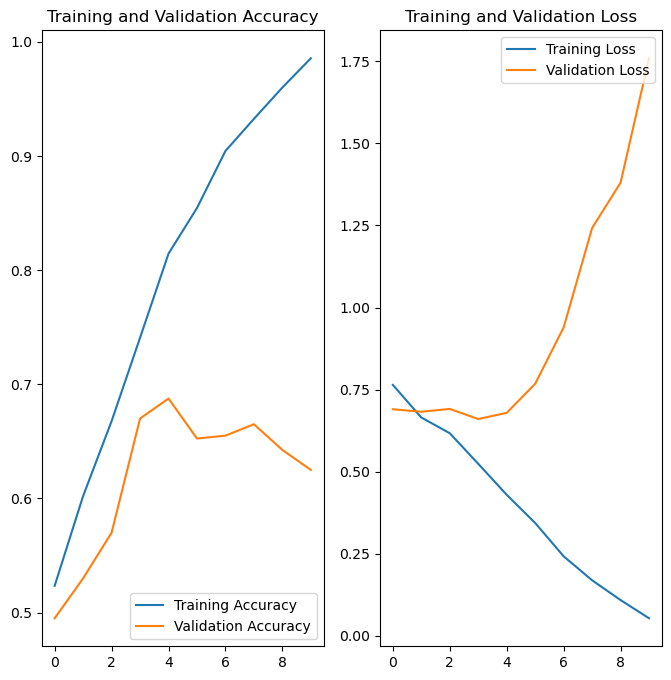

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Overfitting / underfitting
When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.
#### ways to solve overfitting problem
- get more data (data augmentation)
- get less complex / more complex  model
- features selection (less features means less complex models)
- Ensembling (multiple models predict )
- Early stopping
- Adding dropout layers



### overfitting suggested solutions by chat-gpt
Overfitting occurs in machine learning when a model is too complex and learns the training data too well, to the point that it begins to memorize the data instead of generalizing to new, unseen data. This results in a model that performs very well on the training data but poorly on new data. To solve overfitting in machine learning, you can try the following techniques:

- Increase the amount of training data: Overfitting can occur when there is not enough data for the model to learn from. By increasing the amount of training data, you can provide the model with more examples to learn from, which can help it generalize better.

- Simplify the model: Overfitting can also occur when the model is too complex for the data it is trying to learn. Simplifying the model can help reduce overfitting. This can be achieved by reducing the number of layers or neurons in a neural network, decreasing the degree of a polynomial regression model, or reducing the number of features in a linear regression model.

- Regularization: Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function of the model. This penalty term discourages the model from learning too much from the training data and encourages it to generalize better. Two common types of regularization techniques are L1 and L2 regularization.

- Dropout: Dropout is a technique used to prevent overfitting in neural networks. It involves randomly dropping out neurons during training, which forces the remaining neurons to learn more robust features and prevents the model from memorizing the training data.

- Cross-validation: Cross-validation is a technique used to evaluate the performance of a model on a new, unseen dataset. By using a validation set during training and testing, you can assess the model's ability to generalize to new data and detect overfitting.

- Early stopping: Early stopping is a technique used to prevent overfitting by stopping the training process when the model's performance on the validation set stops improving. This prevents the model from overfitting to the training data and improves its ability to generalize to new data.

By applying these techniques, you can reduce overfitting and improve the generalization performance of your machine learning model.

## Data augmentation (get more data)
Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

### Image preprocessing
These layers are for standardizing the inputs of an image model.

- tf.keras.layers.Resizing: resizes a batch of images to a target size.
- tf.keras.layers.Rescaling: rescales and offsets the values of a batch of image (e.g. go from inputs in the [0, 255] range to inputs in the [0, 1] range.
- tf.keras.layers.CenterCrop: returns a center crop of a batch of images.
### Image data augmentation
These layers apply random augmentation transforms to a batch of images. They are only active during training.

- tf.keras.layers.RandomFlip
- tf.keras.layers.RandomRotation
- tf.keras.layers.RandomZoom. 
- tf.keras.layers.RandomCrop
- tf.keras.layers.RandomTranslation
- tf.keras.layers.RandomHeight
- tf.keras.layers.RandomWidth
- tf.keras.layers.RandomContrast

These can be included inside your model like other layers, and run on the GPU.

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

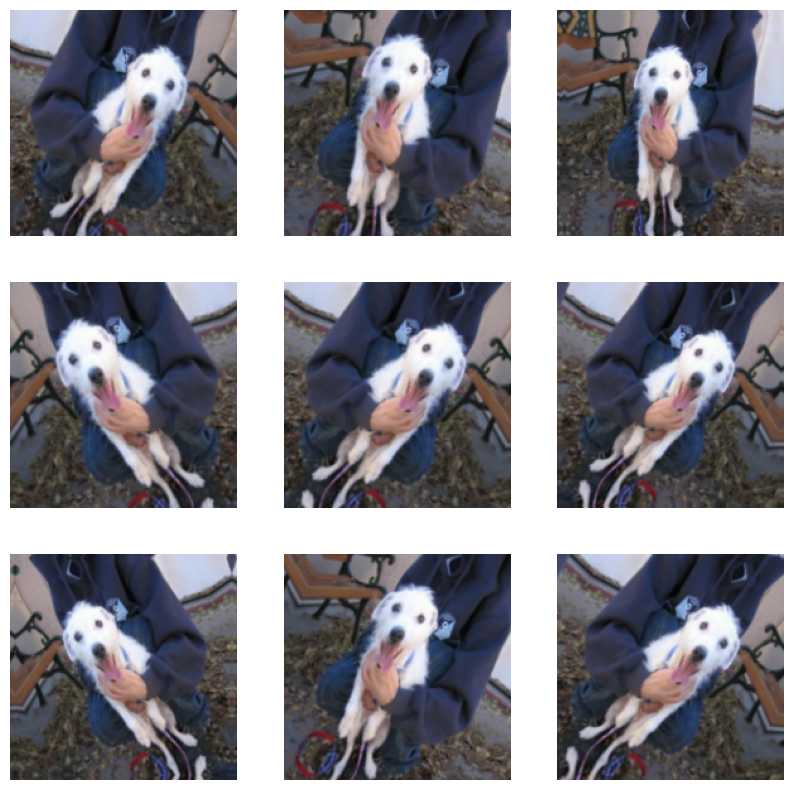

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[1].numpy().astype("uint8"))
        plt.axis("off")

## Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

- tf.keras.layers

In [23]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [25]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
51/51 [==============================] - 34s 608ms/step - loss: 0.7219 - accuracy: 0.5265 - val_loss: 0.6858 - val_accuracy: 0.5200
Epoch 2/15
51/51 [==============================] - 30s 588ms/step - loss: 0.6761 - accuracy: 0.5784 - val_loss: 0.6445 - val_accuracy: 0.6350
Epoch 3/15
51/51 [==============================] - 30s 595ms/step - loss: 0.6414 - accuracy: 0.6321 - val_loss: 0.6540 - val_accuracy: 0.6100
Epoch 4/15
51/51 [==============================] - 33s 641ms/step - loss: 0.6266 - accuracy: 0.6677 - val_loss: 0.6672 - val_accuracy: 0.5950
Epoch 5/15
51/51 [==============================] - 32s 633ms/step - loss: 0.6145 - accuracy: 0.6733 - val_loss: 0.6601 - val_accuracy: 0.6400
Epoch 6/15
51/51 [==============================] - 33s 641ms/step - loss: 0.6033 - accuracy: 0.6752 - val_loss: 0.6566 - val_accuracy: 0.6250
Epoch 7/15
51/51 [==============================] - 33s 643ms/step - loss: 0.5816 - accuracy: 0.7114 - val_loss: 0.6568 - val_accuracy: 0.6325

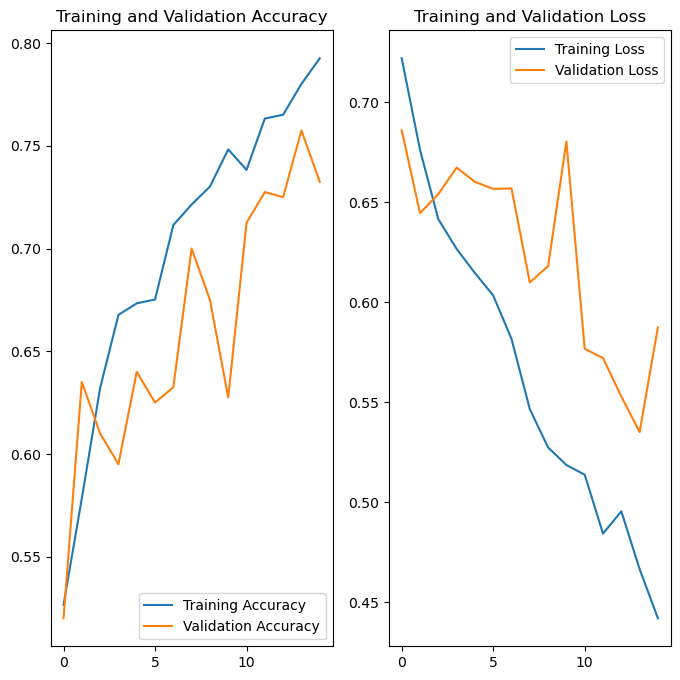

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 174ms/step
This image most likely belongs to dogs with a 99.71 percent confidence.


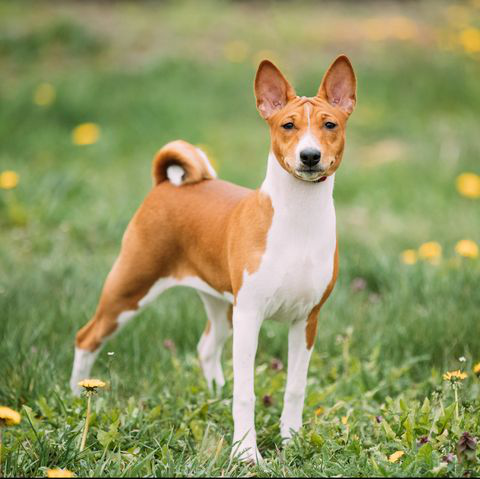

In [27]:
testfile = 'test\image5.jpg'
img = tf.keras.utils.load_img(
    testfile, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(testfile)

## Transfer learning

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.
- Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

#### The most common incarnation of transfer learning in the context of deep learning is the following workflow:

- Take layers from a previously trained model.
- Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
- Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
- Train the new layers on your dataset.




In [28]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(180, 180, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

In [29]:
img_height, img_width

(180, 180)

In [30]:
base_model.trainable = False
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 89, 89, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [31]:
model.build(input_shape=(180,180,3))

In [32]:
model = Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./127.5, offset=-1),
  data_augmentation,
  base_model,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
51/51 [==============================] - 135s 2s/step - loss: 2.0359 - accuracy: 0.9200 - val_loss: 0.7549 - val_accuracy: 0.9650
Epoch 2/10
51/51 [==============================] - 124s 2s/step - loss: 0.3246 - accuracy: 0.9713 - val_loss: 0.2599 - val_accuracy: 0.9800
Epoch 3/10
51/51 [==============================] - 110s 2s/step - loss: 0.2392 - accuracy: 0.9719 - val_loss: 0.4259 - val_accuracy: 0.9650
Epoch 4/10
51/51 [==============================] - 109s 2s/step - loss: 0.1205 - accuracy: 0.9819 - val_loss: 0.2573 - val_accuracy: 0.9725
Epoch 5/10
51/51 [==============================] - 104s 2s/step - loss: 0.2120 - accuracy: 0.9663 - val_loss: 0.2553 - val_accuracy: 0.9775
Epoch 6/10
51/51 [==============================] - 102s 2s/step - loss: 0.0776 - accuracy: 0.9863 - val_loss: 0.2015 - val_accuracy: 0.9725
Epoch 7/10
51/51 [==============================] - 102s 2s/step - loss: 0.0683 - accuracy: 0.9863 - val_loss: 0.2006 - val_accuracy: 0.9725
Epoch 8/10
51

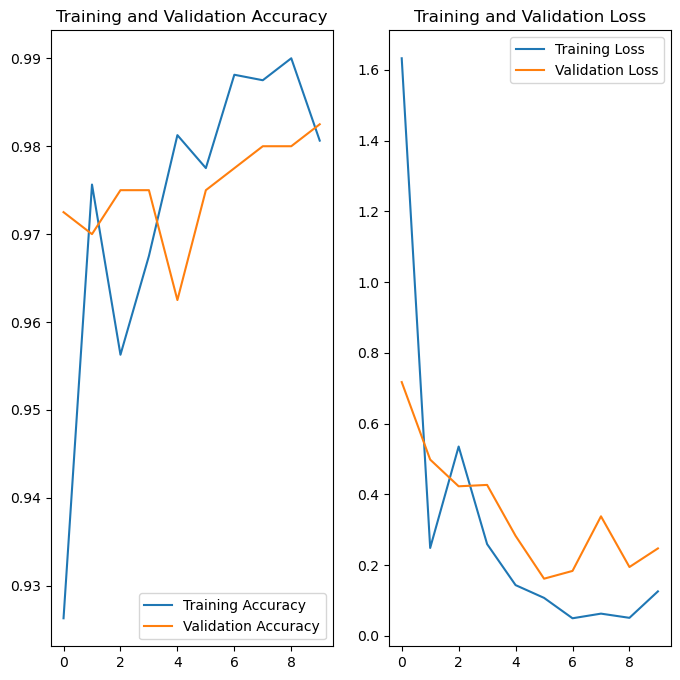

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()